# Assignment-3

**Due Date:** 14.12.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------

**Student:** Name Surname

**Github Classroom:** https://classroom.github.com/a/Wv6S7qnL



## Part I: Theory Questions

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving soru1.PNG to soru1.PNG
Saving soru2.PNG to soru2.PNG
Saving soru3.PNG to soru3.PNG


Question 1


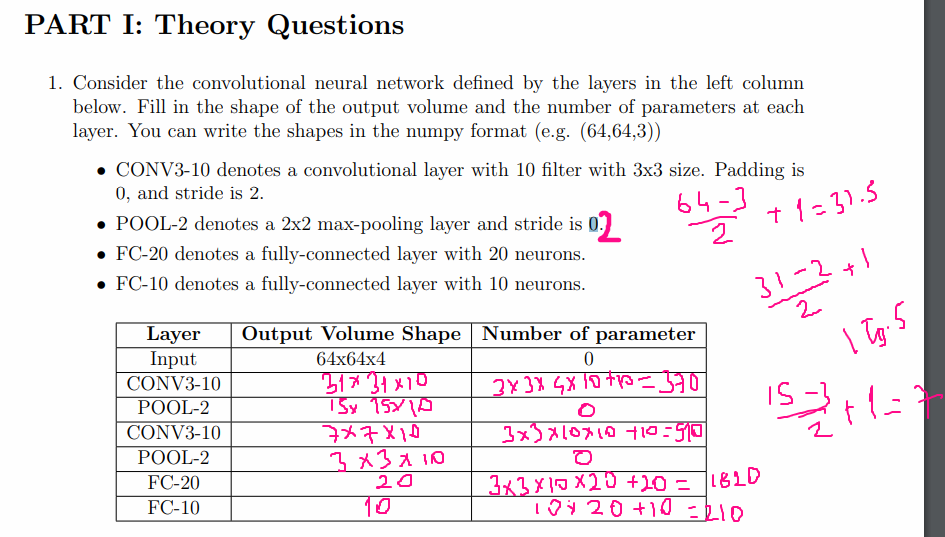

In [ ]:
print("Question 1")
Image("/content/soru1.PNG",width = 500)

Question 2


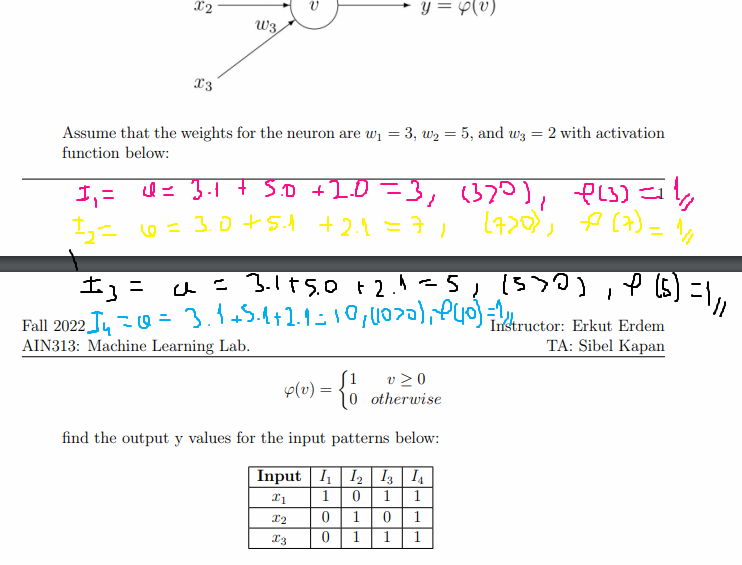

In [ ]:
print("Question 2")
Image("/content/soru2.PNG",width = 500)

Question 3


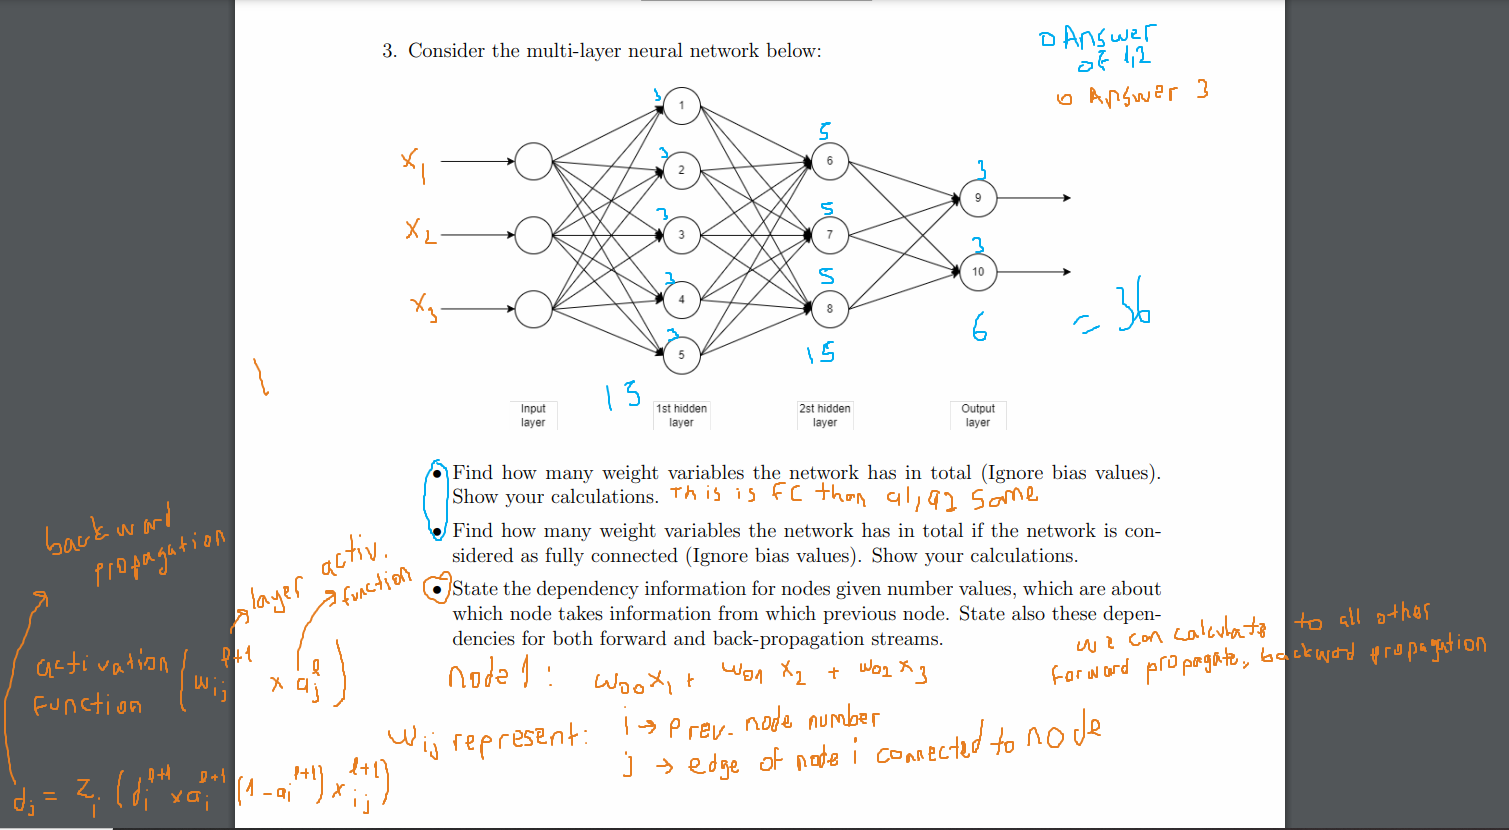

In [ ]:
print("Question 3")
Image("/content/soru3.PNG",width = 500)

Write your answers. You can add a picture or write it as a markdown.

## Part II: Classification of Flower Species using Neural Network


### Dataset Upload

Dataset uploaded from Drive or local

In [ ]:
import os

import cv2

from matplotlib import image

from PIL import Image

from google.colab import files as FILE

from os import listdir

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import argparse

from google.colab.patches import cv2_imshow

from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
img = cv2.imread('/content/drive/MyDrive/flowers/flowers/train/lotus/lotus_1.jpg')

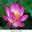

In [ ]:
cv2_imshow(img)

In [ ]:
import os
import numpy as np
import tqdm
import glob
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from  torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
data_path = ' https://drive.google.com/file/d/1PyTLK4lCJR7kvntCTxyiTSU5vegDw2dz/view?usp=sharing'

id = data_path.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('archive.zip')

In [ ]:
! unzip archive.zip -d archive

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: archive/flowers/train/lotus/lotus_281.jpg  
  inflating: archive/flowers/train/lotus/lotus_282.jpg  
  inflating: archive/flowers/train/lotus/lotus_283.jpg  
  inflating: archive/flowers/train/lotus/lotus_284.jpg  
  inflating: archive/flowers/train/lotus/lotus_285.jpg  
  inflating: archive/flowers/train/lotus/lotus_286.jpg  
  inflating: archive/flowers/train/lotus/lotus_287.jpg  
  inflating: archive/flowers/train/lotus/lotus_288.jpg  
  inflating: archive/flowers/train/lotus/lotus_289.jpg  
  inflating: archive/flowers/train/lotus/lotus_29.jpg  
  inflating: archive/flowers/train/lotus/lotus_290.jpg  
  inflating: archive/flowers/train/lotus/lotus_291.jpg  
  inflating: archive/flowers/train/lotus/lotus_292.jpg  
  inflating: archive/flowers/train/lotus/lotus_293.jpg  
  inflating: archive/flowers/train/lotus/lotus_294.jpg  
  inflating: archive/flowers/train/lotus/lotus_295.jpg  
  inflating: archive/flowers/train/lotus/l

In [ ]:
ROOT_PATH = '/content/archive'
training_path = f'{ROOT_PATH}/flowers/train'
validation_path = f'{ROOT_PATH}/flowers/test'


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]

image_size = 32      # 32x32, 64x64, 128x128
batch_size = 64

main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # 32x32
    transforms.ToTensor(),
    transforms.Normalize(mean,std)      # normalize
])

train_dataset64 = datasets.ImageFolder(training_path, transform=main_transform)

evaluation_dataset64 = datasets.ImageFolder(validation_path, transform=main_transform)

train_dataloader64 = DataLoader(train_dataset64, batch_size = batch_size, shuffle=True, num_workers=2)

evaluation_dataloader64 = DataLoader(evaluation_dataset64, batch_size = batch_size, shuffle=False, num_workers=2)

In [ ]:
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]

image_size = 32      # 32x32, 64x64, 128x128
batch_size = 128

main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # 32x32
    transforms.ToTensor(),
    transforms.Normalize(mean,std)      # normalize
])

train_dataset128 = datasets.ImageFolder(training_path, transform=main_transform)

evaluation_dataset128 = datasets.ImageFolder(validation_path, transform=main_transform)

train_dataloader128 = DataLoader(train_dataset128, batch_size = batch_size, shuffle=True, num_workers=2)

evaluation_dataloader128 = DataLoader(evaluation_dataset128, batch_size = batch_size, shuffle=False, num_workers=2)

In [ ]:
#Here is the begin step of this assignment
#Creating input-hidden-output layer and connecting them
#creating the NN with 32-32 picture and hidden layer with n neuron, also has learning rate and activation function
def nn_Creater(device, size, activ, rate, hidden,type):

  for layer in range(len(hidden)):
    if(layer == 0):
      myModel = nn.Sequential() 
      myModel.add_module("f", nn.Flatten())
      myModel.add_module("input", nn.Linear(size*size*3, hidden[0], device = device))
      myModel.add_module("activation",activ)
    elif (layer == 0 and layer != len(hidden)-2):
      myModel.add_module("hidden"+str(layer), nn.Linear(hidden[layer], hidden[layer+1], device = device))
      myModel.add_module("activation"+str(layer), activ)
    if(layer == len(hidden)-2):
        myModel.add_module("output", nn.Linear(hidden[-1],7,device = device))
        crit = nn.CrossEntropyLoss()
        if(type == 'adam'):
          opt = optim.Adam(myModel.parameters(), lr = rate)
        elif (type == 'sgd'):
          opt = optim.SGD(myModel.parameters(), lr = rate)
        return myModel, crit, opt

In [ ]:
#Here is the training step that trains images on created nn. 
def train(model, device, opt, rate, train, batch_size, crit):
  model.to(device)
  epoch = 12
  losses = []
  for epoch in range(epoch):
    total_loss = 0
    correctness = 0
    for batch in (train):
      opt.zero_grad()
      
      images = batch[0].to(device)
      labels = batch[1].to(device)
      
      output = model(images)
      loss = crit(output, labels)
      losses.append(loss.item())
      total_loss += loss.item()
      _, preds = torch.max(output,1)
      correctness +=(preds == labels).sum().item()

      loss.backward()
      opt.step()

  return losses, correctness, total_loss


In [ ]:
# here is the last part of the mlp that tests the test images on trained NN.
def test(test, model, device):
  model.to(device)
  model.eval()
  correct = 0
  with torch.no_grad():
    for batch in (test):
      images = batch[0].to(device)
      labels = batch[1].to(device)
      output = model(images)
      _, preds = torch.max(output.data,1)
      correct += (preds==labels).sum().item()
  return correct

In [ ]:
#Here my MLP structurethat creates nn and takes correct-loss, true to print accuracy. 
model,crit,opt = nn_Creater(device, 32, torch.nn.ReLU(), 0.01, [1,100,1] ,'adam')

losses, corrects, total_loss = train(model, device, opt, 0.01, train_dataloader128, 128, crit)

true = test(evaluation_dataloader128, model, device)

accuracy = true/len(evaluation_dataset128)

print(accuracy)

0.2557142857142857


In [ ]:
model2,crit2,opt2 = nn_Creater(device, 32, torch.nn.ReLU(), 0.01, [1,50,1] ,'adam')

losses2, corrects2, total_loss2 = train(model2, device, opt2, 0.01, train_dataloader128, 128,crit2)

true2 = test(evaluation_dataloader128, model2, device)

accuracy2 = true2/len(evaluation_dataset128)

print(accuracy2)

0.26857142857142857


In [ ]:
model3,crit3,opt3 = nn_Creater(device, 32, torch.nn.ReLU(), 0.1, [1,100,100,1] ,'sgd')

losses3, corrects3, total_loss3 = train(model3, device, opt3, 0.1, train_dataloader128, 128,crit3)

true3 = test(evaluation_dataloader128, model3, device)

accuracy3 = true3/len(evaluation_dataset128)

print(accuracy3)

0.27285714285714285


In [ ]:
model4,crit4,opt4 = nn_Creater(device, 32, torch.nn.ReLU(), 0.01, [1,100,100,1] ,'sgd')

losses4, corrects4, total_loss4 = train(model4, device, opt4, 0.01, train_dataloader128, 128,crit4)

true4 = test(evaluation_dataloader128, model4, device)

accuracy4 = true4/len(evaluation_dataset128)

print(accuracy4)

0.195


In [ ]:
model1_1, crit1_1, opt1_1 = nn_Creater(device, 32, torch.nn.ReLU(), 0.01, [1,30,1], 'adam')

losses1_1, corrects1_1 , total_loss1_1 = train(model1_1, device, opt1_1, 0.01, train_dataloader64, 64, crit1_1)

true1_1 = test(evaluation_dataloader64, model1_1, device)

accuracy1_1 = true1_1/len(evaluation_dataloader64)

print(accuracy1_1)

15.636363636363637


In [ ]:
model2_2, crit2_2, opt2_2 = nn_Creater(device, 32, torch.nn.ReLU(), 0.1, [1,30,1], 'adam')

losses2_2, corrects2_2 , total_loss2_2 = train(model2_2, device, opt2_2, 0.1, train_dataloader64, 64, crit2_2)

true2_2 = test(evaluation_dataloader64, model2_2, device)

accuracy2_2 = true2_2/len(evaluation_dataloader64)

print(accuracy2_2)

17.545454545454547


In [ ]:
model3_3, crit3_3, opt3_3 = nn_Creater(device, 32, torch.nn.ReLU(), 0.1, [1,20,20,1], 'adam')

losses3_3, corrects3_3 , total_loss3_3 = train(model3_3, device, opt3_3, 0.1, train_dataloader64, 64, crit3_3)

true3_3 = test(evaluation_dataloader64, model3_3, device)

accuracy3_3 = true3_3/len(evaluation_dataloader64)

print(accuracy3_3)

9.181818181818182


In [ ]:
model4_4, crit4_4, opt4_4 = nn_Creater(device, 32, torch.nn.ReLU(), 0.1, [1,20,20,1], 'sgd')

losses4_4, corrects4_4 , total_loss4_4 = train(model4_4, device, opt4_4, 0.1, train_dataloader64, 64, crit4_4)

true4_4 = test(evaluation_dataloader64, model4_4, device)

accuracy4_4 = true4_4/len(evaluation_dataloader64)

print(accuracy4_4)

15.818181818181818


In [ ]:
#CNN

In [ ]:
#Here is the first step of CNN structure that contains different number of conv and pool
model5 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(300,7))

In [ ]:
model6 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,nn.MaxPool2d(3, stride=2)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(48,7))

In [ ]:
model7 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 4, stride = 1, padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(75,7))

In [ ]:
model8 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 6, stride = 2 , padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 4, stride = 1, padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(243,7))

In [ ]:
  #1

In [ ]:
#Optimizer to optimize model before training
optimizer = optim.SGD(model5.parameters(),lr=0.05)

In [ ]:
#Training of the CNN model epoch by epoch
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader128):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model5(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader128)))

Epoch [1/10], Loss: 1.6490
Epoch [2/10], Loss: 1.4011
Epoch [3/10], Loss: 1.3696
Epoch [4/10], Loss: 1.3407
Epoch [5/10], Loss: 1.3131
Epoch [6/10], Loss: 1.2946
Epoch [7/10], Loss: 1.2786
Epoch [8/10], Loss: 1.2623
Epoch [9/10], Loss: 1.2448
Epoch [10/10], Loss: 1.2202


In [ ]:
#Test part of the CNN and printing the accuracy from here
model5.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader128:
    # Forward pass
    outputs = model5(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader128)
accuracy = num_correct / len(evaluation_dataloader128)

# Print the loss and accuracy
  

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.3628
Test accuracy: 61.4545


In [ ]:
#2

In [ ]:
optimizer = optim.SGD(model6.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader128):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model6(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader128)))

Epoch [1/10], Loss: 1.9091
Epoch [2/10], Loss: 1.7970
Epoch [3/10], Loss: 1.7104
Epoch [4/10], Loss: 1.6460
Epoch [5/10], Loss: 1.5851
Epoch [6/10], Loss: 1.5216
Epoch [7/10], Loss: 1.4682
Epoch [8/10], Loss: 1.4212
Epoch [9/10], Loss: 1.3817
Epoch [10/10], Loss: 1.3506


In [ ]:
model6.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader128:
    # Forward pass
    outputs = model6(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader128)
accuracy = num_correct / len(evaluation_dataloader128)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.3348
Test accuracy: 65.8182


In [ ]:
#3

In [ ]:
optimizer = optim.SGD(model7.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader128):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model7(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader128)))

Epoch [1/10], Loss: 1.9325
Epoch [2/10], Loss: 1.8757
Epoch [3/10], Loss: 1.7840
Epoch [4/10], Loss: 1.6729
Epoch [5/10], Loss: 1.5969
Epoch [6/10], Loss: 1.5502
Epoch [7/10], Loss: 1.5195
Epoch [8/10], Loss: 1.5035
Epoch [9/10], Loss: 1.4877
Epoch [10/10], Loss: 1.4748


In [ ]:
model7.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader128:
    # Forward pass
    outputs = model7(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader128)
accuracy = num_correct / len(evaluation_dataloader128)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.4654
Test accuracy: 58.4545


In [ ]:
#4

In [ ]:
optimizer = optim.SGD(model8.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader128):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model8(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader128)))

Epoch [1/10], Loss: 1.9211
Epoch [2/10], Loss: 1.8072
Epoch [3/10], Loss: 1.7091
Epoch [4/10], Loss: 1.6217
Epoch [5/10], Loss: 1.5021
Epoch [6/10], Loss: 1.4332
Epoch [7/10], Loss: 1.4036
Epoch [8/10], Loss: 1.3818
Epoch [9/10], Loss: 1.3603
Epoch [10/10], Loss: 1.3414


In [ ]:
model8.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader128:
    # Forward pass
    outputs = model8(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader128)
accuracy = num_correct / len(evaluation_dataloader128)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.3787
Test accuracy: 62.7273


In [ ]:
#5


In [ ]:
model5_2 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(300,7))

In [ ]:
optimizer = optim.SGD(model5_2.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader64):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model5_2(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader64)))

Epoch [1/10], Loss: 1.7889
Epoch [2/10], Loss: 1.5311
Epoch [3/10], Loss: 1.4492
Epoch [4/10], Loss: 1.4073
Epoch [5/10], Loss: 1.3753
Epoch [6/10], Loss: 1.3485
Epoch [7/10], Loss: 1.3277
Epoch [8/10], Loss: 1.3100
Epoch [9/10], Loss: 1.2996
Epoch [10/10], Loss: 1.2873


In [ ]:
model5_2.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader64:
    # Forward pass
    outputs = model5_2(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader64)
accuracy = num_correct / len(evaluation_dataloader64)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.3498
Test accuracy: 31.5000


In [ ]:
#6

In [ ]:
model6_2 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,nn.MaxPool2d(3, stride=2)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(48,7))

In [ ]:
optimizer = optim.SGD(model6_2.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader64):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model6_2(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader64)))

Epoch [1/10], Loss: 1.8143
Epoch [2/10], Loss: 1.6232
Epoch [3/10], Loss: 1.4952
Epoch [4/10], Loss: 1.4046
Epoch [5/10], Loss: 1.3529
Epoch [6/10], Loss: 1.3191
Epoch [7/10], Loss: 1.2967
Epoch [8/10], Loss: 1.2775
Epoch [9/10], Loss: 1.2628
Epoch [10/10], Loss: 1.2501


In [ ]:
model6_2.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader64:
    # Forward pass
    outputs = model6_2(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader64)
accuracy = num_correct / len(evaluation_dataloader64)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.2476
Test accuracy: 33.5455


In [ ]:
#7

In [ ]:
model7_2 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 4, stride = 1, padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(75,7))

In [ ]:
optimizer = optim.SGD(model7_2.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader64):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model7_2(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader64)))

Epoch [1/10], Loss: 1.8947
Epoch [2/10], Loss: 1.7487
Epoch [3/10], Loss: 1.6473
Epoch [4/10], Loss: 1.5247
Epoch [5/10], Loss: 1.4274
Epoch [6/10], Loss: 1.3918
Epoch [7/10], Loss: 1.3742
Epoch [8/10], Loss: 1.3517
Epoch [9/10], Loss: 1.3370
Epoch [10/10], Loss: 1.3268


In [ ]:
model7_2.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader64:
    # Forward pass
    outputs = model7_2(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader64)
accuracy = num_correct / len(evaluation_dataloader64)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.4567
Test accuracy: 27.6364


In [ ]:
#8

In [ ]:
model8_2 = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 6, stride = 2 , padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 4, stride = 1, padding= 0)
    ,nn.MaxPool2d(2, stride=1)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(243,7))

In [ ]:
optimizer = optim.SGD(model8_2.parameters(),lr=0.01)

In [ ]:
criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader64):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model8_2(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader64)))

Epoch [1/10], Loss: 1.7975
Epoch [2/10], Loss: 1.5205
Epoch [3/10], Loss: 1.3855
Epoch [4/10], Loss: 1.3358
Epoch [5/10], Loss: 1.3091
Epoch [6/10], Loss: 1.2772
Epoch [7/10], Loss: 1.2491
Epoch [8/10], Loss: 1.2334
Epoch [9/10], Loss: 1.2159
Epoch [10/10], Loss: 1.2075


In [ ]:
model8_2.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader64:
    # Forward pass
    outputs = model8_2(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader64)
accuracy = num_correct / len(evaluation_dataloader64)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 1.5042
Test accuracy: 27.5455


In [ ]:
# Import pandas library
import pandas as pd
 
# initialize list of lists
dataMLP = [
          ["32x32", "ReLU", "128", "1", "100", "0", "adam", "ReLU", "0.01", "25.5"]
        , ["32x32", "ReLU", "128", "1", "50", "0", "adam", "ReLU", "0.01", "26.8"]
        , ["32x32", "ReLU", "128", "2", "100", "100", "sgd", "ReLU", "0.1", "27.2"]
        , ["32x32", "ReLU", "128", "2", "100", "100", "adam", "ReLU", "0.01", "19.5"]
        , ["32x32", "ReLU", "64", "1", "30", "0", "adam", "ReLU", "0.01", "15.6"]
        , ["32x32", "ReLU", "64", "1", "30", "0", "adam", "ReLU", "0.1", "17.5"]
        , ["32x32", "ReLU", "64", "2", "20", "20", "adam", "ReLU", "0.1", "9.18"]
        , ["32x32", "ReLU", "64", "2", "20", "20", "sgd", "ReLU", "0.1", "15.81"]
        ]

 
# Create the pandas DataFrame
dataMLP = pd.DataFrame(dataMLP, columns=['size', 'activation', "batch_size", "hiddenLayer_size", "first_layer", "second layer", "critizerion", "optimizer", "learning_rate", "accuracy"])
 
# print dataframe.
dataMLP

,size,activation,batch_size,hiddenLayer_size,first_layer,second layer,critizerion,optimizer,learning_rate,accuracy
0,32x32,ReLU,128,1,100,0,adam,ReLU,0.01,25.5
1,32x32,ReLU,128,1,50,0,adam,ReLU,0.01,26.8
2,32x32,ReLU,128,2,100,100,sgd,ReLU,0.1,27.2
3,32x32,ReLU,128,2,100,100,adam,ReLU,0.01,19.5
4,32x32,ReLU,64,1,30,0,adam,ReLU,0.01,15.6
5,32x32,ReLU,64,1,30,0,adam,ReLU,0.1,17.5
6,32x32,ReLU,64,2,20,20,adam,ReLU,0.1,9.18
7,32x32,ReLU,64,2,20,20,sgd,ReLU,0.1,15.81


In [ ]:
"""
As a conclusion, in MLP I changed size of neuron  -  critizerion   -   learning rate. 
When I change the neuron size 100->50 accuracy increased, 
When I change the critizerion sgd-> adam accuracy  decreased
When I change the learning rate 0.01->0.1  accuracy increased.
Then I learned that more neuron make overfit, critizerion sgd better than adam for this experiment, Learning rate 0.1 was better choice for me then 0.01
The accuracy of batch size 128 is better than 64 for all examples
Moreover, increasing eproachs makes model better but, I did not try that in this experiment. 
"""

In [ ]:
import pandas as pd
 
# initialize list of lists
dataCNN = [
          ["32x32", "SGD", "128", "0.01", "1", "0", "61.4"]
        , ["32x32", "SGD", "128", "0.01", "1", "1", "65.8"]
        , ["32x32", "SGD", "128", "0.01", "2", "2", "58.4"]
        , ["32x32", "SGD", "128", "0.01", "2", "2", "62.7"]
        , ["32x32", "SGD", "64", "0.01", "1", "0", "31.5"]
        , ["32x32", "SGD", "64", "0.01", "1", "1", "33.5"]
        , ["32x32", "SGD", "64", "0.01", "2", "2", "27.6"]
        , ["32x32", "SGD", "64", "0.01", "2", "2", "27.5"]
        ]

 
# Create the pandas DataFrame
dataCNN = pd.DataFrame(dataCNN, columns=['size', "optimizer", "batch_size", "learning_rate", "conv_layer_number", "pooling_number", "accuracy"])
 
# print dataframe.
dataCNN

,size,optimizer,batch_size,learning_rate,conv_layer_number,pooling_number,accuracy
0,32x32,SGD,128,0.01,1,0,61.4
1,32x32,SGD,128,0.01,1,1,65.8
2,32x32,SGD,128,0.01,2,2,58.4
3,32x32,SGD,128,0.01,2,2,62.7
4,32x32,SGD,64,0.01,1,0,31.5
5,32x32,SGD,64,0.01,1,1,33.5
6,32x32,SGD,64,0.01,2,2,27.6
7,32x32,SGD,64,0.01,2,2,27.5


In [ ]:
"""
As a conclusion, in MLP I changed size of convLayer  -  Pooling   -   learning rate. 
When I added a pooling and accuracy is increased, 
When I change kernel size - stride I increased them but accuracy  decreased
When I change the batch size 128 to 64 and the accuracy decreas into half.

Moreover, as I see that if I increase the number of conv layer and pooling layer more accuracy is decreased
If I make enough conv-pool layer as like second example that we see best accuracy 65. The others make worse data.
"""

In [ ]:
"""
CNN VS MLP
-CNN give us better accuracy and a bit easier implementation
-CNN learns images better than MLP
-worse CNN accuracy almost better than MLP for this experiment

If I would like to say something to challenger which will start to write this experiment, I would say that use CNN and use 1-1 conv and pooling layer.
I think I could not fint the max accuracy for this experiment but, if I want to develop this code maybe it will take the best accuracy. Because, I know 
what should I change and do.
"""

In [ ]:
data_path = 'https://drive.google.com/file/d/18GFlfav8wCmuX3r0Y_BEH5imWIEK7OQT/view?usp=sharing'

id = data_path.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('archive.zip')

In [ ]:
! unzip archive.zip -d archive

Archive:  archive.zip
   creating: archive/chest_xray/
   creating: archive/chest_xray/test/
   creating: archive/chest_xray/test/covid/
  inflating: archive/chest_xray/test/covid/covid-1.jpg  
  inflating: archive/chest_xray/test/covid/covid-10.jpg  
  inflating: archive/chest_xray/test/covid/covid-100.jpg  
  inflating: archive/chest_xray/test/covid/covid-11.jpg  
  inflating: archive/chest_xray/test/covid/covid-12.jpg  
  inflating: archive/chest_xray/test/covid/covid-13.jpg  
  inflating: archive/chest_xray/test/covid/covid-14.jpg  
  inflating: archive/chest_xray/test/covid/covid-15.jpg  
  inflating: archive/chest_xray/test/covid/covid-16.jpg  
  inflating: archive/chest_xray/test/covid/covid-17.jpg  
  inflating: archive/chest_xray/test/covid/covid-18.jpg  
  inflating: archive/chest_xray/test/covid/covid-19.jpg  
  inflating: archive/chest_xray/test/covid/covid-2.jpg  
  inflating: archive/chest_xray/test/covid/covid-20.jpg  
  inflating: archive/chest_xray/test/covid/covid-21.

In [ ]:
ROOT_PATH = '/content/archive'
training_path = f'{ROOT_PATH}/chest_xray/train'
validation_path = f'{ROOT_PATH}/chest_xray/test'


In [ ]:
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]

image_size = 32      # 32x32, 64x64, 128x128
batch_size = 128

main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # 32x32
    transforms.ToTensor(),
    transforms.Normalize(mean,std)      # normalize
])

train_dataset128 = datasets.ImageFolder(training_path, transform=main_transform)

evaluation_dataset128 = datasets.ImageFolder(validation_path, transform=main_transform)

train_dataloader128 = DataLoader(train_dataset128, batch_size = batch_size, shuffle=True, num_workers=2)

evaluation_dataloader128 = DataLoader(evaluation_dataset128, batch_size = batch_size, shuffle=False, num_workers=2)

In [ ]:
model,crit,opt = nn_Creater(device, 32, torch.nn.ReLU(), 0.01, [1,100,1] ,'adam')

losses, corrects, total_loss = train(model, device, opt, 0.01, train_dataloader128, 128, crit)

true = test(evaluation_dataloader128, model, device)

accuracy = true/len(evaluation_dataset128)

print(accuracy)

0.3333333333333333


In [ ]:
model = nn.Sequential(
     nn.Conv2d(in_channels = 3, out_channels = 3 , kernel_size = 5, stride = 3 , padding= 0)
    ,nn.MaxPool2d(3, stride=2)
    ,torch.nn.ReLU()
    ,nn.Flatten()
    ,nn.Linear(48,7))

optimizer = optim.SGD(model.parameters(),lr=0.01)

criterion = nn.CrossEntropyLoss()
ephoc_number = 10
for epoch in range(ephoc_number):
    running_loss = 0
  #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_dataloader128):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
          
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, ephoc_number, running_loss/len(train_dataloader128)))

Epoch [1/10], Loss: 1.6273
Epoch [2/10], Loss: 1.0116
Epoch [3/10], Loss: 0.7894
Epoch [4/10], Loss: 0.6910
Epoch [5/10], Loss: 0.6339
Epoch [6/10], Loss: 0.5921
Epoch [7/10], Loss: 0.5611
Epoch [8/10], Loss: 0.5321
Epoch [9/10], Loss: 0.5178
Epoch [10/10], Loss: 0.4877


In [ ]:
model.eval()
# Initialize variables to store loss and accuracy
test_loss = 0.0
num_correct = 0
# Iterate over the test dataset
for inputs, labels in evaluation_dataloader128:
    # Forward pass
    outputs = model(inputs)
    # Calculate the loss
    loss = criterion(outputs, labels)
    # Add the loss to the running test loss
    test_loss += loss.item()
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs.data, 1)
    # Increment the number of correct predictions
    num_correct += (predicted == labels).sum().item()

# Calculate the average loss and accuracy
test_loss /= len(evaluation_dataloader128)
accuracy = num_correct / len(evaluation_dataloader128)

# Print the loss and accuracy

In [ ]:
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.5515
Test accuracy: 75.0000


In [ ]:
"""
If we talk about bonus part, I took best accuracy here after trained 16 different model. As we see I used the second model of CNN in CNN and first model of MLP from MLP 
I took better accuracy score for both. If we compare tham the chest dataset has less classes than the flower dataset. It is the main reason for difference on accuracy.
Chest has 3 but flowers has 7 classes. It makes the predicting flowers harder. 
Also, I want to add this if someone ask how I increase my accuracy for this assignment I say:
- increase number of epoch
- use 0.1 learning rate
- 50 neurons enough for layer
- 1-1 conv and pooling is enough because you have 32-32 data
- use sgd for critizerion
- use higher batch size.

In this experiment comparing 4 different parameter is expected from us 
I compared (batch_size, learning_rate, critizerion, conv-pool(stride-kernel_size), neuron_number)  
"""